# CSC478 - Assignment 2 - Gunjan Pandya

In [286]:
pwd

'C:\\Users\\GunjanPandya\\Downloads\\CSC478'

In [3]:
cd C:\Users\GunjanPandya\Downloads\CSC478\newsgroups

C:\Users\GunjanPandya\Downloads\CSC478\newsgroups


In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]
For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in text applications of machine learning techniques, such as text classification and text clustering (see the description of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of  terms. Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are also provided in separate files. The training and test data contain a row for each term in the vocabulary and a column for each document. The values in the table represent raw term frequencies. The data has already been preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not full terms). Please be sure to read the readme.txt file in the distribution.

Your tasks in this problem are the following [Note: for this problem you should not use scikit-learn or other external libraries other than Pandas, NumPy, standard Python libraries, and Matplotlib (if you would like to add some visualizations to your answers.]

In [211]:
# Loading the data

train_data = pd.read_table('trainMatrixModified.txt',header=None)

In [212]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [213]:
train_data.shape

(5500, 800)

In [214]:
test_data = pd.read_table('testMatrixModified.txt',header=None)

In [215]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
test_data.shape

(5500, 200)

In [217]:
terms = pd.read_table('modifiedterms.txt',header=None)

In [218]:
terms.head()

,0
0,david
1,rex
2,wood
3,subject
4,call


In [219]:
terms.shape

(5500, 1)

In [220]:
train_classes = pd.read_table('trainClasses.txt',header=None)

In [221]:
train_classes.head()

,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [237]:
train_labels = train_classes.drop(train_classes.columns[0], axis=1)
train_labels.head()

,1
0,0
1,1
2,0
3,1
4,0


In [233]:
test_classes = pd.read_table('testClasses.txt',header=None)

In [234]:
test_classes.head()

,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1


In [236]:
test_labels = test_classes.drop(test_classes.columns[0], axis=1)
test_labels

,1
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [239]:
#converting from TD to DT matrix

DT_train = train_data.T
DT_test = test_data.T

In [240]:
DT_train

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,2.0,2.0,2.0,1.0,8.0,6.0,2.0,8.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
#Taking terms and Analyze term frequency by forming a dictionary of terms and their counts in the document-term matrix

terms = np.genfromtxt("modifiedterms.txt", dtype=str)
terms[0:30]

tFreq = DT_train.sum(axis=1)

dictTF = {}
for i in range(len(tFreq)):
    dictTF[terms[i]] = tFreq[i]
print(sorted(dictTF.items()))
sorteddictTF = sorted(dictTF.values(), reverse=True)

[('00', 159.0), ('10', 254.0), ('1010', 105.0), ('125', 74.0), ('14', 100.0), ('1990', 73.0), ('1991', 159.0), ('1992', 23.0), ('1993', 80.0), ('1st', 67.0), ('20', 32.0), ('21', 61.0), ('25', 136.0), ('2nd', 24.0), ('30', 59.0), ('4324219', 24.0), ('50', 78.0), ('5000', 286.0), ('63', 44.0), ('635', 42.0), ('705', 78.0), ('89', 204.0), ('919', 113.0), ('999', 32.0), ('abc', 172.0), ('abl', 73.0), ('accept', 195.0), ('access', 53.0), ('act', 168.0), ('activ', 107.0), ('actual', 485.0), ('adam', 81.0), ('add', 205.0), ('addit', 53.0), ('address', 31.0), ('admit', 81.0), ('admittedli', 202.0), ('advanc', 125.0), ('advantag', 45.0), ('advic', 75.0), ('afternoon', 102.0), ('ago', 78.0), ('allstar', 47.0), ('altern', 2.0), ('amount', 330.0), ('analyst', 51.0), ('anderson', 99.0), ('andrewcmuedu', 28.0), ('angel', 253.0), ('angelo', 72.0), ('announc', 48.0), ('anonym', 28.0), ('anybodi', 89.0), ('anymor', 89.0), ('anywai', 792.0), ('app', 50.0), ('appear', 214.0), ('appropri', 74.0), ('archi

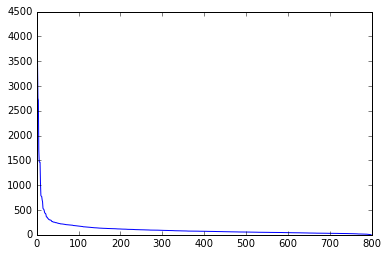

In [420]:
plt.plot(sorteddictTF)
plt.show()

# a. Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [432]:
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [468]:
def knn_search(x, D, L, K, measure):
    """ find K nearest neighbours of data among D """
    if measure == 0:
        # euclidean distances from the other points
        inX = x
        diffMat = np.tile(inX, (D.shape[0],1)) - D
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        dists = sqDistances**0.5
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    #print(dists)
    idx = np.argsort(dists) # sorting
    #print(idx[:K])
    # return the indexes of K nearest neighbours
    neigh_labels = L[idx[:K]]
    class0 = 0
    class1 = 0
    for index in neigh_labels:
        #print(L[index])
        if L[index] == 0:
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        if class0 > class1:
            predicted_class = 0
        else:
            predicted_class = 1
    #print("The " + str(K) + " Nearest Neighbours are:" + str(idx[:K]))
    #print("The predicted class is: " + str(predicted_class))
    return idx[:K], predicted_class

I just thought of printing it as its same as returning but didn't wanted to lose any grades for printing and not returning the values as the problem said it should return, so commented printing and just returning values.

Trying a few vectors from the test data and the results.

In [469]:
neigh_idx, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 667 152 427]
The predicted class is: 1


In [470]:
neigh_idx, predicted_class = knn_search(DT_test[0], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[685 628 703 266 510]
The predicted class is: 1


In [471]:
neigh_idx, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[382 775 163 587 550 127 485 651 767]
The predicted class is: 0


In [472]:
neigh_idx, predicted_class = knn_search(DT_test[1], DT_train, train_labels, 9, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 554 757 224  38 119 711 398 608]
The predicted class is: 0


In [473]:
neigh_idx, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[255 405 556 744 170]
The predicted class is: 1


In [474]:
neigh_idx, predicted_class = knn_search(DT_test[99], DT_train, train_labels, 5, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[744 405 556 170  49]
The predicted class is: 1


In [475]:
neigh_idx, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 1)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[322 664  14 145 440 792 232 254 546  52   5 246 203 618  73]
The predicted class is: 1


In [476]:
neigh_idx, predicted_class = knn_search(DT_test[199], DT_train, train_labels, 15, 0)
print("The Nearest Neighbours are:" + str(neigh_idx))
print("The predicted class is: " + str(predicted_class))

The Nearest Neighbours are:[798 757 224  38 119 711 398  69 751 342  53 644 706 551 464]
The predicted class is: 0


So looking at the results above in one case which is the last one we can see different predictions for Euclidean and Cosine distance/similarity measures. If we look at the test labels here Cosine similarity (measure=1) results into correct prediction for that particular test vector.

# b. Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [496]:
def accuracy(x, D, train_L, test_L, K, measure):
    count = 0
    correct = 0
    for i in range(x.shape[0]):
        #Use the first i rows of the testing data, one-by-one, in the knn function
        count += 1
        neigh_idx, predicted_class = knn_search(x[i,:], D, train_L, K, measure)
        #If the two classes match, add 1 to the correct count
        if (predicted_class == test_L[i]):
            correct += 1
    accuracypercent = (correct/count)*100
    print("Accuracy is: " + str(accuracypercent) + "%")
    return accuracypercent

In [482]:
accuracypercent = accuracy(DT_test, DT_train, train_labels, test_labels, 5, 0)

163
200
Accuracy is: 81.5%


# c. Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [517]:
import matplotlib.pyplot as pyplot
def plot_accuracy(x, D, train_L, test_L):
    i = 1
    accEuc = {}
    accCos = {}
    for i in range(20):
        i += 1
        accEuc[i] = accuracy(x, D, train_L, test_L, i, 0)
        #print(accEuc)
        accCos[i] = accuracy(x, D, train_L, test_L, i, 1)
        #print(accCos)
    df_toPlotEuc = pd.DataFrame(list(accEuc.items()))
    df_toPlotCos = pd.DataFrame(list(accCos.items()))
    plt.plot( df_toPlotEuc[0], df_toPlotEuc[1], 'r^--', label="Eucliudean")
    plt.plot( df_toPlotCos[0], df_toPlotCos[1], 'bs-', label="Cosine")
    plt.xlabel("Number of Neighbours")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Comparison For k-Nearest Neighbours")
    plt.legend(loc="best")
    plt.show()
   

Accuracy is: 78.0%
{1: 78.0}
Accuracy is: 98.5%
{1: 98.5}
Accuracy is: 67.5%
{1: 78.0, 2: 67.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0}
Accuracy is: 81.0%
{1: 78.0, 2: 67.5, 3: 81.0}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0}
Accuracy is: 77.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0}
Accuracy is: 81.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0}
Accuracy is: 83.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5}
Accuracy is: 76.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0}
Accuracy is: 80.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5, 8: 80.0}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0, 8: 97.5}
Accuracy is: 75.0%
{1: 78.0, 2: 

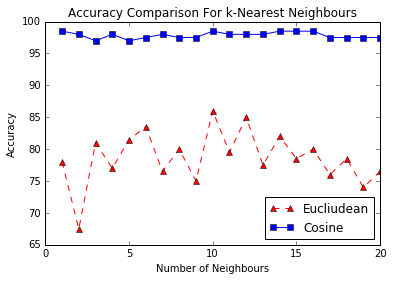

In [518]:
plot_accuracy(DT_test, DT_train, train_labels, test_labels)

So from the graph above we can see that the performance of the classifier is much better with Cosine similarity as similarity measure as compared to when we use Euclidean distance. 

The maximum accuracy achieved using Cosine similarity is 98.5% which is for k = 1, 10, 14, 15, 16.

The maximum accuracy achieved using Euclidean distance is 86% which is for k = 10.

# d. Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [555]:
#Loading term-document data
train_data = pd.read_table('trainMatrixModified.txt',header=None)
test_data = pd.read_table('testMatrixModified.txt',header=None)

TD_train = np.array(train_data)
TD_test = np.array(test_data)

numTerms_train = len(TD_train[:,0])
NDocs_train = len(TD_train[0])
print(numTerms_train)
print(NDocs_train)

numTerms_test = len(TD_test[:,0])
NDocs_test = len(TD_test[0])
print(numTerms_test)
print(NDocs_test)

#Finding document frequencies
DF_train = np.array([(TD_train!=0).sum(1)]).T
DF_test = np.array([(TD_test!=0).sum(1)]).T

5500
800
5500
200


In [556]:
print(DF_train)

[[50]
 [ 7]
 [10]
 ..., 
 [ 2]
 [ 2]
 [ 2]]


In [557]:
print(DF_test)

[[15]
 [ 0]
 [ 1]
 ..., 
 [ 1]
 [ 1]
 [ 1]]


In [558]:
#Create a matrix with all entries = NDocs
NMatrix_train = np.ones(np.shape(TD_train), dtype=float)*NDocs_train
print(NMatrix_train)

NMatrix_test = np.ones(np.shape(TD_test), dtype=float)*NDocs_test
print(NMatrix_test)

[[ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 ..., 
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]
 [ 800.  800.  800. ...,  800.  800.  800.]]
[[ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 ..., 
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]
 [ 200.  200.  200. ...,  200.  200.  200.]]


In [559]:
#Converting into IDF Values

IDF_train = np.log2(np.divide(NMatrix_train, DF_train))
print(IDF_train)

IDF_test = np.log2(np.divide(NMatrix_test, DF_test))
print(IDF_test)

[[ 4.          4.          4.         ...,  4.          4.          4.        ]
 [ 6.83650127  6.83650127  6.83650127 ...,  6.83650127  6.83650127
   6.83650127]
 [ 6.32192809  6.32192809  6.32192809 ...,  6.32192809  6.32192809
   6.32192809]
 ..., 
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]
 [ 8.64385619  8.64385619  8.64385619 ...,  8.64385619  8.64385619
   8.64385619]]
[[ 3.73696559  3.73696559  3.73696559 ...,  3.73696559  3.73696559
   3.73696559]
 [        inf         inf         inf ...,         inf         inf
          inf]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 ..., 
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]
 [ 7.64385619  7.64385619  7.64385619 ...,  7.64385619  7.64385619
   7.64385619]]


In [561]:
#Computing TFxIDF values for each document-term entry

TF_IDF_train = TD_train*IDF_train
print(TF_IDF_train)

TF_IDF_test = TD_test*IDF_test
print(TF_IDF_test)

[[  8.           0.           0.         ...,   0.           0.           0.        ]
 [ 13.67300254   0.           0.         ...,   0.           0.           0.        ]
 [ 12.64385619   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 0.          0.          3.73696559 ...,  0.          0.          0.        ]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.         

Accuracy is: 78.0%
{1: 78.0}
Accuracy is: 98.5%
{1: 98.5}
Accuracy is: 67.5%
{1: 78.0, 2: 67.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0}
Accuracy is: 81.0%
{1: 78.0, 2: 67.5, 3: 81.0}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0}
Accuracy is: 77.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0}
Accuracy is: 81.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5}
Accuracy is: 97.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0}
Accuracy is: 83.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5}
Accuracy is: 76.5%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5}
Accuracy is: 98.0%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0}
Accuracy is: 80.0%
{1: 78.0, 2: 67.5, 3: 81.0, 4: 77.0, 5: 81.5, 6: 83.5, 7: 76.5, 8: 80.0}
Accuracy is: 97.5%
{1: 98.5, 2: 98.0, 3: 97.0, 4: 98.0, 5: 97.0, 6: 97.5, 7: 98.0, 8: 97.5}
Accuracy is: 75.0%
{1: 78.0, 2: 

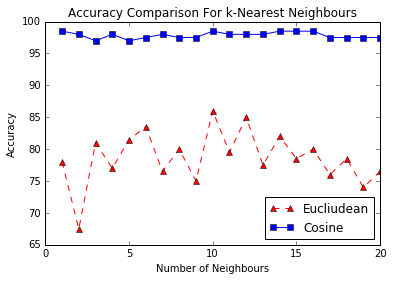

In [564]:
plot_accuracy(TF_IDF_test, TF_IDF_train, train_labels, test_labels)

# e. Create a classifier based on the Rocchio Method adapted for text categorization. Your classifier should take as input the training data matrix, the training labels, and the instance to be classified. It should compute the prototype vectors for each of the categories and measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class and include the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

# 2. Classification using scikit-learn [Dataset: bank_data.csv]
For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

Your tasks in this problem are the following:

# a. Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [6]:
pwd

'C:\\Users\\GunjanPandya\\Downloads'

In [7]:
cd C:\Users\GunjanPandya\Downloads\CSC478

C:\Users\GunjanPandya\Downloads\CSC478


In [8]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_bank_data = pd.read_csv('bank_data.csv',index_col=0)

#We will not need ID anyways for classification, so rather then dropping it before converting it to CSV, storing it as IndexError

In [10]:
df_bank_data.head(10)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


In [11]:
df_bank_data.shape

(600, 11)

Let's separate the target attribute and the attributes used for model training

In [12]:
df_records = df_bank_data[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
df_records.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [13]:
df_target = df_bank_data.pep
df_target.head()

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

Next, we use Pandas "get_dummies" function to create dummy variables.

In [14]:
data_ssf = pd.get_dummies(df_records, columns = ["gender","region","married","car","savings_acct","current_acct","mortgage"])

In [15]:
data_ssf.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
ID12102,40,30085.10,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
ID12103,51,16575.40,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12104,23,20375.40,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12105,57,50576.30,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12106,57,37869.60,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12107,22,8877.07,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12108,58,24946.60,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12109,37,25304.30,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation".

In [16]:
from sklearn.cross_validation import train_test_split

df_train, df_test, df_target_train, df_target_test = train_test_split(data_ssf, df_target, test_size=0.2, random_state=33)

In [17]:
df_train.shape

(480, 19)

In [18]:
df_test.shape

(120, 19)

In [19]:
df_target_train.shape

(480,)

In [20]:
df_target_test.shape

(120,)

# b. Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

Normalizing the data to be used in the KNN classifier.

In [21]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(df_train)
df_train_norm = min_max_scaler.transform(df_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(df_test)
df_test_norm = min_max_scaler.transform(df_test)

In [22]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_train_norm[0:5]

array([[ 0.57,  0.46,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.8 ,  0.78,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.14,  0.16,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.35,  0.18,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.33,  0.18,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [23]:
df_test_norm[0:5]

array([[ 0.29,  0.15,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.84,  0.45,  0.33,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.88,  0.67,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.71,  0.8 ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.96,  0.6 ,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ]])

In [24]:
#k-nearest neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

bank_data_knn = KNeighborsClassifier(n_neighbors = 4, metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [25]:
df_target_predict = bank_data_knn.predict(df_test_norm)
df_target_predict

array(['YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO'], dtype=object)

Classification report

In [26]:
from sklearn.metrics import classification_report

print(classification_report(df_target_test, df_target_predict))

             precision    recall  f1-score   support

         NO       0.65      0.77      0.71        66
        YES       0.64      0.50      0.56        54

avg / total       0.65      0.65      0.64       120



Confusion matrix - And its visualization using matplotlib

[[51 15]
 [27 27]]


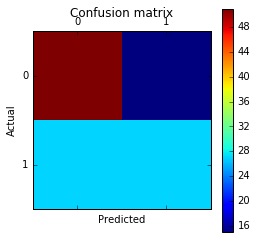

In [27]:
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)

print(knn_confusion_matrix)

plt.matshow(knn_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Average Accuracy Score (over test data)

In [28]:
bank_data_knn.score(df_test_norm, df_target_test)

0.65000000000000002

Average Accuracy Score (over training data)

In [29]:
bank_data_knn.score(df_train_norm, df_target_train)

0.75624999999999998

In [30]:
#Changing the kNN parameters (k, metric, weights)

bank_data_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.71      0.69        66
        YES       0.62      0.57      0.60        54

avg / total       0.65      0.65      0.65       120

[[47 19]
 [23 31]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [31]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.73      0.70        66
        YES       0.62      0.56      0.59        54

avg / total       0.65      0.65      0.65       120

[[48 18]
 [24 30]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [32]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.68      0.70      0.69        66
        YES       0.62      0.59      0.60        54

avg / total       0.65      0.65      0.65       120

[[46 20]
 [22 32]]
Accuracy on test data:0.65
Accuracy on training data:1.0


In [33]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.68      0.71      0.70        66
        YES       0.63      0.59      0.61        54

avg / total       0.66      0.66      0.66       120

[[47 19]
 [22 32]]
Accuracy on test data:0.658333333333
Accuracy on training data:1.0


In [34]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.64      0.67      0.65        66
        YES       0.57      0.54      0.55        54

avg / total       0.61      0.61      0.61       120

[[44 22]
 [25 29]]
Accuracy on test data:0.608333333333
Accuracy on training data:1.0


In [35]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.64      0.67      0.65        66
        YES       0.57      0.54      0.55        54

avg / total       0.61      0.61      0.61       120

[[44 22]
 [25 29]]
Accuracy on test data:0.608333333333
Accuracy on training data:1.0


Changing the value of k in the model parameters we can see that the maximum accuracy we achieve on test data is 65.08% or 0.6583 for k = 11 and then it starts decreasing if we increase the value of k.

Changing the weights parameter.

In [36]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.70      0.68        66
        YES       0.61      0.57      0.59        54

avg / total       0.64      0.64      0.64       120

[[46 20]
 [23 31]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.783333333333


In [37]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.69      0.73      0.71        66
        YES       0.64      0.59      0.62        54

avg / total       0.67      0.67      0.67       120

[[48 18]
 [22 32]]
Accuracy on test data:0.666666666667
Accuracy on training data:0.777083333333


In [38]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.69      0.77      0.73        66
        YES       0.67      0.57      0.62        54

avg / total       0.68      0.68      0.68       120

[[51 15]
 [23 31]]
Accuracy on test data:0.683333333333
Accuracy on training data:0.770833333333


In [39]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.66      0.71      0.69        66
        YES       0.61      0.56      0.58        54

avg / total       0.64      0.64      0.64       120

[[47 19]
 [24 30]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.770833333333


In [40]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.66      0.71      0.69        66
        YES       0.61      0.56      0.58        54

avg / total       0.64      0.64      0.64       120

[[47 19]
 [24 30]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.745833333333


In [41]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform', metric='euclidean')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.67      0.68      0.68        66
        YES       0.60      0.59      0.60        54

avg / total       0.64      0.64      0.64       120

[[45 21]
 [22 32]]
Accuracy on test data:0.641666666667
Accuracy on training data:0.735416666667


Changing the value of weights in the model parameters we can see that the maximum accuracy we achieve on test data is 68.33% or 0.6833 for k = 9 and then it starts decreasing. Also changing the weights to "uniform" improves precision.

Changing the metric parameter.

In [48]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.65      0.70      0.67        66
        YES       0.59      0.54      0.56        54

avg / total       0.62      0.62      0.62       120

[[46 20]
 [25 29]]
Accuracy on test data:0.625
Accuracy on training data:1.0


In [53]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.61      0.65      0.63        66
        YES       0.54      0.50      0.52        54

avg / total       0.58      0.58      0.58       120

[[43 23]
 [27 27]]
Accuracy on test data:0.583333333333
Accuracy on training data:1.0


In [49]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.66      0.70      0.68        66
        YES       0.60      0.56      0.58        54

avg / total       0.63      0.63      0.63       120

[[46 20]
 [24 30]]
Accuracy on test data:0.633333333333
Accuracy on training data:1.0


In [50]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.68      0.76      0.71        66
        YES       0.65      0.56      0.60        54

avg / total       0.67      0.67      0.66       120

[[50 16]
 [24 30]]
Accuracy on test data:0.666666666667
Accuracy on training data:1.0


In [51]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.65      0.70      0.67        66
        YES       0.59      0.54      0.56        54

avg / total       0.62      0.62      0.62       120

[[46 20]
 [25 29]]
Accuracy on test data:0.625
Accuracy on training data:1.0


In [52]:
bank_data_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric='manhattan')
bank_data_knn.fit(df_train_norm, df_target_train)
df_target_predict = bank_data_knn.predict(df_test_norm)

from sklearn.metrics import classification_report
print(classification_report(df_target_test, df_target_predict))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = df_target_predict)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_data_knn.score(df_test_norm, df_target_test)))
print("Accuracy on training data:" + str(bank_data_knn.score(df_train_norm, df_target_train)))

             precision    recall  f1-score   support

         NO       0.65      0.67      0.66        66
        YES       0.58      0.56      0.57        54

avg / total       0.62      0.62      0.62       120

[[44 22]
 [24 30]]
Accuracy on test data:0.616666666667
Accuracy on training data:1.0


Changing the value of distance metric in the model parameters we can see that the maximum accuracy we achieve on test data is 66.66% or 0.6666 for k = 11 and then it starts decreasing. So maximum accuracy achieved using "manhattan" distance is slightly more than what we achieved using "euclidean", so we can say for classification in this dataset manhattan seems to have better accuracy than euclidean.

So the parameters that worked best are:
Accuracy peaks at k value of 9-11 with distance measure as manhattan and uniform weights.

# c. Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [121]:
#Decision tree classifier  - scikit-learn (default paramters)

from sklearn.tree import tree

treeclf = tree.DecisionTreeClassifier(random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(df_train_norm, df_target_train)

treepreds_test = treeclf.predict(df_test_norm)

In [122]:
#Accuracy on testing data

print (treeclf.score(df_test_norm, df_target_test))

0.8


In [123]:
#Accuracy on training data

print (treeclf.score(df_train_norm, df_target_train))

1.0


In [124]:
print(classification_report(df_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.82      0.82      0.82        66
        YES       0.78      0.78      0.78        54

avg / total       0.80      0.80      0.80       120



[[54 12]
 [12 42]]


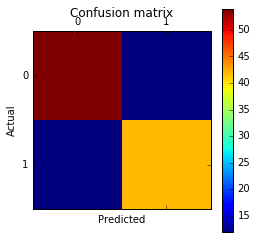

In [125]:
from sklearn.metrics import confusion_matrix

dTree_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = treepreds_test)

print(dTree_confusion_matrix)

plt.matshow(dTree_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [129]:
#Decision tree with modified parameters

treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 12, random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(df_train_norm, df_target_train)
print (treeclf.score(df_test_norm, df_target_test))
print (treeclf.score(df_train_norm, df_target_train))
print(classification_report(df_target_test, treepreds_test))

0.833333333333
0.885416666667
             precision    recall  f1-score   support

         NO       0.82      0.82      0.82        66
        YES       0.78      0.78      0.78        54

avg / total       0.80      0.80      0.80       120



In [133]:
#Decision tree with modified parameters

treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 50, random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(df_train_norm, df_target_train)
print (treeclf.score(df_test_norm, df_target_test))
print (treeclf.score(df_train_norm, df_target_train))
print(classification_report(df_target_test, treepreds_test))

0.691666666667
0.791666666667
             precision    recall  f1-score   support

         NO       0.82      0.82      0.82        66
        YES       0.78      0.78      0.78        54

avg / total       0.80      0.80      0.80       120



If we keep the default parameters, that is minimum samples per leaf value to be 1 (very complex tree), we can see that we are getting 100% accuracy on training data but accuracy on testing data comes out to be 80% which shows that we are overfitting the data in our model and it performs very well on training set but its performance goes down on testing data and training and testing accuracies are not within acceptables ranges (more than 10% difference).

So here we can see that the accuracy we get using decision tree when we change one of its parameters, is 83.33% on testing data and 88.54% on training data, so testing and training accuracy are within acceptable ranges (less than 10% difference) and there is no bias-variance trade off or in other words underfitting or overfitting.

If we keep the miminum samples per leaf value to be high and equal to 50 (comparitively simple tree), we can see that the accuracy on both testing and training comes down to around 69% and 79%, which is probably we are underfitting the data and keeping the models too simple, which is resulting into high bias, which can cause an algorithm to miss the relevant relations between features and target outputs (in other words underfitting).

In [146]:
#(Gaussian) naive Bayes classifier
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(df_train_norm, df_target_train)
nbpreds_test = nbclf.predict(df_test_norm)

In [147]:
#Accuracy on testing data

print (nbclf.score(df_test_norm, df_target_test))

0.6


In [148]:
#Accuracy on training data

print (nbclf.score(df_train_norm, df_target_train))

0.670833333333


In [149]:
print(classification_report(df_target_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.63      0.67      0.65        66
        YES       0.56      0.52      0.54        54

avg / total       0.60      0.60      0.60       120



[[44 22]
 [26 28]]


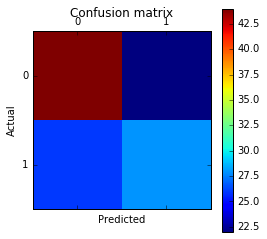

In [150]:
from sklearn.metrics import confusion_matrix

nb_confusion_matrix = confusion_matrix(y_true = df_target_test, y_pred = nbpreds_test)

print(nb_confusion_matrix)

plt.matshow(nb_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So here we can see that the accuracy we get using naive bayes, is 60% on testing data and 67.08% on training data, so testing and training accuracy are within acceptable ranges (less than 10% difference) and there is no bias-variance trade off or in other words underfitting or overfitting.

# d. Discuss your observations based on the above experiments.

So here from the above experiments we can see that the Decision Tree works best on this given dataset in the task of classifying the records into whether they will buy PEP or not. The accuracy for decision tree with modified parameters comes out to be 83% on training data where as the peak accuracy achieved using k Nearest Neighbour classifier is around 68% and Naive Bayes classifies with 60% accuracy on testing data.

Also by tweaking the parameters of the k Nearest Neighbour classifier we observed that:

1) Changing the value of k in the model parameters we can see that the maximum accuracy we achieve on test data is 65.08% or 0.6583 for k = 11 and then it starts decreasing if we increase the value of k.

2) Changing the value of weights in the model parameters we can see that the maximum accuracy we achieve on test data is 68.33% or 0.6833 for k = 9 and then it starts decreasing. Also changing the weights to "uniform" improves precision.

3) Changing the value of distance metric in the model parameters we can see that the maximum accuracy we achieve on test data is 66.66% or 0.6666 for k = 11 and then it starts decreasing. So maximum accuracy achieved using "manhattan" distance is slightly more than what we achieved using "euclidean", so we can say for classification in this dataset manhattan seems to have better accuracy than euclidean.

Modifying the parameters of decision tree we were able to see bias-variance trade off and how model underfits and overfits.

# 3. Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]. For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed. Your tasks in this problem are the following:

# a. Preprocessing and data analysis:

# 1) Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [151]:
pwd

'C:\\Users\\GunjanPandya\\Downloads\\CSC478'

In [152]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
df_adult = pd.read_csv('adult-modified.csv', na_values=['?'])

#Replacing all "?" (missing values) with NaN

In [161]:
df_adult.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [162]:
df_adult.shape

(10000, 8)

In [176]:
df_adult.dtypes

age               float64
workclass          object
education           int64
marital-status     object
race               object
sex                object
hours-per-week      int64
income             object
dtype: object

In [163]:
df_adult.describe(include='all')

C:\Users\GunjanPandya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.611949,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [164]:
df_adult[df_adult.age.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
19,NaN,Self-emp,14,Single,White,Female,45,>50K
27,NaN,NaN,10,Married,Asian,Male,60,>50K
40,NaN,Private,5,Married,White,Male,43,<=50K
65,NaN,Private,9,Married,White,Male,40,<=50K
80,NaN,Private,9,Single,White,Male,30,<=50K
89,NaN,Public,16,Single,White,Female,50,>50K
95,NaN,Public,10,Single,White,Male,50,<=50K
113,NaN,Private,10,Married,White,Female,25,<=50K
132,NaN,Self-emp,9,Married,White,Male,35,<=50K
147,NaN,Private,9,Married,White,Female,24,<=50K


198 missing values in Age column.

In [168]:
df_adult[df_adult.workclass.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income
27,NaN,NaN,10,Married,Asian,Male,60,>50K
61,32.0,NaN,4,Married,White,Male,40,<=50K
69,25.0,NaN,10,Single,White,Male,40,<=50K
77,67.0,NaN,6,Married,White,Male,2,<=50K
106,17.0,NaN,6,Single,White,Female,32,<=50K
128,35.0,NaN,9,Married,White,Male,40,<=50K
149,43.0,NaN,10,Single,White,Female,40,<=50K
154,52.0,NaN,9,Single,White,Male,45,>50K
160,68.0,NaN,2,Single,White,Female,20,<=50K
187,53.0,NaN,13,Single,White,Female,50,<=50K


588 missing values in workclass column.

In [169]:
df_adult[df_adult.education.isnull()]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


In [182]:
#Some issue reading the data from marital-status column due to - in column name so renaming it
col_name =df_adult.columns[3]
df_adult=df_adult.rename(columns = {col_name:'maritalstatus'})

df_adult[df_adult.maritalstatus.isnull()]

,age,workclass,education,maritalstatus,race,sex,hours-per-week,income


In [179]:
df_adult[df_adult.race.isnull()]

,age,workclass,education,marital,race,sex,hours-per-week,income


In [180]:
df_adult[df_adult.sex.isnull()]

,age,workclass,education,marital,race,sex,hours-per-week,income


In [183]:
##Some issue reading the data from hours-per-week column due to - in column name so renaming it
col_name =df_adult.columns[6]
df_adult=df_adult.rename(columns = {col_name:'hoursperweek'})

df_adult[df_adult.hoursperweek.isnull()]

,age,workclass,education,maritalstatus,race,sex,hoursperweek,income


In [184]:
df_adult[df_adult.income.isnull()]

,age,workclass,education,maritalstatus,race,sex,hoursperweek,income


So we have missing values in "age" and "workclass" columns.

We will replace missign values in "age" column by mean and will remove instances with missing values for "workclass" column.

In [188]:
#Replacing missing values in age by mean of age

age_mean = df_adult.age.mean()
df_adult.age.fillna(age_mean, axis=0, inplace=True)
df_adult.shape

(10000, 8)

In [191]:
#Dropping instances with missing values for "workclass" column

df_adult.dropna(axis=0, inplace=True)
df_adult.shape

(9412, 8)

In [195]:
df_adult[df_adult.workclass.isnull()]

,age,workclass,education,maritalstatus,race,sex,hoursperweek,income


So no more missing values in dataframe.

# 2) Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [193]:
df_adult.dtypes

age              float64
workclass         object
education          int64
maritalstatus     object
race              object
sex               object
hoursperweek       int64
income            object
dtype: object

In [196]:
df_adult.describe(include='all')

,age,workclass,education,maritalstatus,race,sex,hoursperweek,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.366342,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962039,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


So here we can see that the variables which have numeric values are Age, Education and Hours Per Week, rest are all categorical variables.

Education can be considered as a ordinal variables as it has finite set of values from 1-16 and each level represents a particular education level.

In [198]:
# Descriptive Statistics for three Numerical Attributes

df_adult[["age","education","hoursperweek"]].describe()

,age,education,hoursperweek
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


So the table shows us mean, standard deviation and five number summary of numerical attributes

Age: Mean: 38.366 SD: 12.96 Min: 17 Max: 90

Education: Mean: 10.125 SD: 2.54 Min: 1 Max: 16

Hours Per Week: Mean: 41.080 SD: 11.88 Min: 1 Max: 99

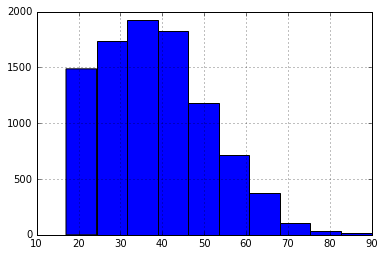

In [200]:
df_adult.age.hist()

So we can see that most of the people in the dataset has age less than 45 years and the histogram generated here and so the distribution is right skewed.

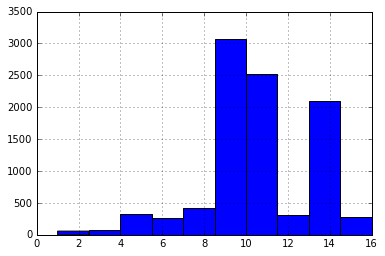

In [209]:
df_adult.education.hist()

So we can see that most of the people in the data set has education level between 9 and 14.

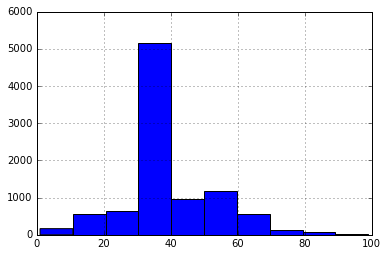

In [210]:
df_adult.hoursperweek.hist()

So we can see that most of the people in data set have hours per week between 30-40.

In [211]:
#Taking a look at the distirbutions of numerical attributes when grouped over categorical attributes

df_adult.groupby('workclass').mean()

,age,education,hoursperweek
workclass,,,
Private,36.798284,9.890600,40.388225
Public,40.946806,11.098709,40.449506
Self-emp,44.894942,10.428571,45.991289


So we can see that the mean age of the self-employed workclass is highest among the mean age of all the workclasses and also the work class self-employed has highest mean hours per week. If we talk about education Public work class has highest mean education.

In [205]:
df_adult.groupby('maritalstatus').mean()

,age,education,hoursperweek
maritalstatus,,,
Married,43.275328,10.253114,43.251847
Single,33.392253,9.995722,38.879786


So we can see that the married people in this dataset have higher mean age, education and hoursperweek compared to those who are single.

In [207]:
df_adult.groupby('sex').mean()

,age,education,hoursperweek
sex,,,
Female,37.013549,10.095081,37.257511
Male,39.008299,10.139590,42.894250


So here we can see that the mean age of males is more in this data set and the mean hours per week is also more. Mean education is almost same for males and females in this dataset.

In [208]:
df_adult.groupby('income').mean()

,age,education,hoursperweek
income,,,
<=50K,36.644604,9.646976,39.567038
>50K,43.632531,11.588185,45.708495


So here we can say that the mean age of people with income more than 50k is higher than the mean of the other class. Also we can see that people who make more than 50k have higher mean working hours per week as compared to those with income less than 50k and mean education of people who makes more than 50k is also more.

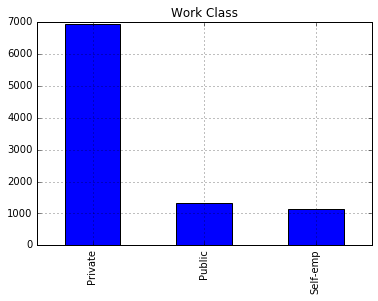

In [214]:
#Plotting distributions of categorical variables
df_adult["workclass"].value_counts().plot(kind="bar",grid= True, title="Work Class")

So we can see that most of the people in datatset have work class as private (around 80%).

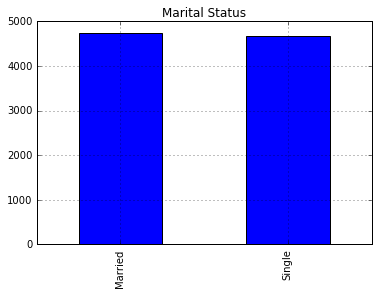

In [215]:
df_adult["maritalstatus"].value_counts().plot(kind="bar",grid= True, title="Marital Status")

So we can see that there are equal number of Married and Single people in this dataset.

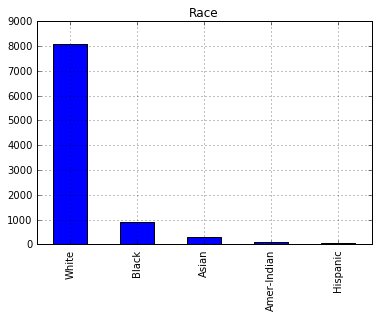

In [216]:
df_adult["race"].value_counts().plot(kind="bar",grid= True, title="Race")

So we can see there is unequal distirution of race in this data set.

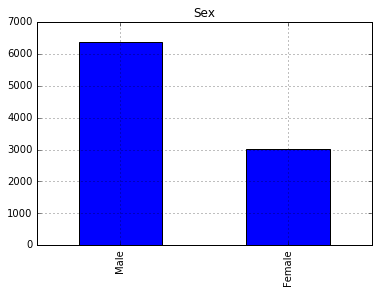

In [217]:
df_adult["sex"].value_counts().plot(kind="bar",grid= True, title="Sex")

So we can see that there are more number of males in this data set as compared to females.

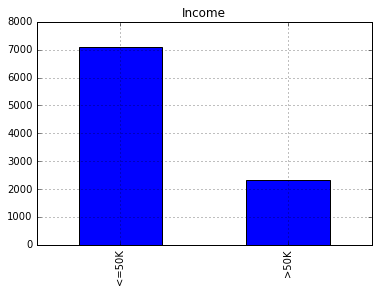

In [218]:
df_adult["income"].value_counts().plot(kind="bar",grid= True, title="Income")

So here we can see that there are more instances of less than or equal to 50k class and less cases for more than 50k, so we can say that the class distribution is unequal and this might affect the performance of the classifiers and might introduce a bias in the models.

# 3) Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

In [220]:
#Crosstab of education + race and bar chart

edu_race = pd.crosstab(df_adult["education"], df_adult["race"])
edu_race

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


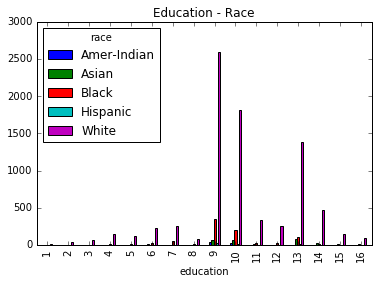

In [221]:
plt.show(edu_race.plot(kind="bar", title="Education - Race"))

So here from the crosstab and bar chart we can see that most of the people irrespective of the race have education between 9-13. Highest number of people from each of the individual race except Asians, have education value of 9 where as for Asians the highest number of poeple have education level of 13 followed by 9 and 10. If we look at the data set on UCI we can infer that level 9 and 10 are HS-grad and some college respectively and level 13 is Bachelors. So we can say that this data set has more number of people who just graduated High School and started working and didn't continued their education further. Most of the people in this data set belong to Race - White and so we can see it dominates all the education levels in terms of numbers and there are highest number of records with White race for each of the education level.

In [222]:
#Crosstab of work-class + income and bar chart

workclass_income = pd.crosstab(df_adult["workclass"], df_adult["income"])
workclass_income

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


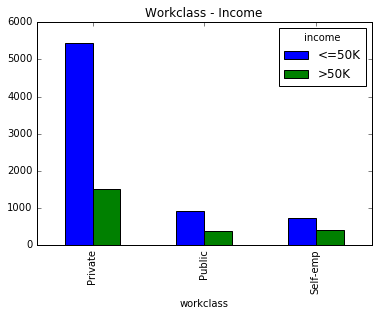

In [223]:
plt.show(workclass_income.plot(kind="bar", title="Workclass - Income"))

So here we can see that there is highly unequal distirbution among all three work classes in terms of income and most of the instances are such that their income is less than or equal to 50k and also most of the people belong to private work class.

In [224]:
#Crosstab of work-class + race and bar chart

workclass_race = pd.crosstab(df_adult["workclass"], df_adult["race"])
workclass_race

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


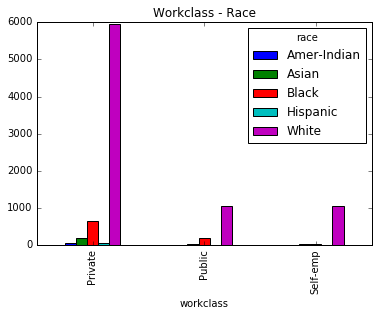

In [225]:
plt.show(workclass_race.plot(kind="bar", title="Workclass - Race"))

As we know that the Race - White has highest number of records in dataset and here as well is dominates all three work classes and there are highest number of whites in all three work classes namely Private,Public and Self-employed followed by Race - Black. Also the number of self employed people belonging to race other than White are very less in number compared to White in that work class.

In [226]:
#Crosstab of race + income and bar chart

race_income = pd.crosstab(df_adult["race"], df_adult["income"])
race_income

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [230]:
pd.crosstab(df_adult.race, df_adult.income).apply(lambda r: r/r.sum()*100, axis=1)

income,<=50K,>50K
race,,
Amer-Indian,90.217391,9.782609
Asian,76.975945,23.024055
Black,86.659193,13.340807
Hispanic,92.000000,8.000000
White,73.728603,26.271397


So for each of the race we can see that most of the records n this data set are under low-income category. If we talk about each race, for the race Amer-Indian 90% of them are under low-income and around 10% are under high-income category, for Asians 77% of them are under low incme category while 23% of them are under high-income category, for Black 87% are under low-income group and 13% are under high-income, for Hispanic 92% have income less than or equal to 50k so they are under low-income group while only 8% are in high-income category, for White 73% are under low-income category and 27% are under high-income category. Among all the races, if we talk for each race, highest percentage of people in low-income category are for hispanics and highest percentage of people under high-income category are for White.

Creating two tables as not sure with the wording: "In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group"

Below table is % in each income group.

In [231]:
pd.crosstab(df_adult.race, df_adult.income).apply(lambda r: r/r.sum()*100, axis=0)

income,<=50K,>50K
race,,
Amer-Indian,1.170168,0.388098
Asian,3.158043,2.889176
Black,10.898069,5.131522
Hispanic,0.972790,0.258732
White,83.800930,91.332471


So we can see that in the low-income group (i.e. income <= 50k), the dominant race is White and it is expected as the data set has higher number of instances where Race is White. White constitutes of 83% people in low-income group followed by Black, Asian, Amer-Indian and Hispanic which are 11%, 3%, 1% and 1% respectively. In the high-income group (i.e. income > 50k), the dominant race is White and it is expected as the data set has higher number of instances where Race is White. White constitutes of 91% people in high-income group followed by Black, Asian, Amer-Indian and Hispanic which are 5%, 2%, 0.4% and 0.25% respectively. Races other than white constitute a very small % in the high-income group which is only 9% while in low-income group other races constitute 17%.

# 4) Compare and contrast the characteristics of the low-income and high-income categories across the different attributes.

In [233]:
df_adult.groupby("income").describe()

age    education  hoursperweek
income                                              
<=50K  count  7093.000000  7093.000000   7093.000000
       mean     36.644604     9.646976     39.567038
       std      13.340142     2.397358     11.868506
       min      17.000000     1.000000      1.000000
       25%      26.000000     9.000000     38.000000
       50%      35.000000     9.000000     40.000000
       75%      45.000000    10.000000     40.000000
       max      90.000000    16.000000     99.000000
>50K   count  2319.000000  2319.000000   2319.000000
       mean     43.632531    11.588185     45.708495
       std      10.042135     2.410764     10.678794
       min      19.000000     2.000000      1.000000
       25%      36.000000     9.000000     40.000000
       50%      43.000000    12.000000     40.000000
       75%      50.000000    13.000000     50.000000
       max      90.000000    16.000000     99.000000

In [234]:
df_adult.groupby("income").mean()

,age,education,hoursperweek
income,,,
<=50K,36.644604,9.646976,39.567038
>50K,43.632531,11.588185,45.708495


So here we can say that the mean age of people with income more than 50k is higher than the mean of the other class. Also we can see that people who make more than 50k have higher mean working hours per week as compared to those with income less than 50k and mean education of people who makes more than 50k is also more.

In [240]:
df_adult.groupby(["income","workclass"])["workclass"].count()

income  workclass
<=50K   Private      5443
        Public        925
        Self-emp      725
>50K    Private      1504
        Public        392
        Self-emp      423
Name: workclass, dtype: int64

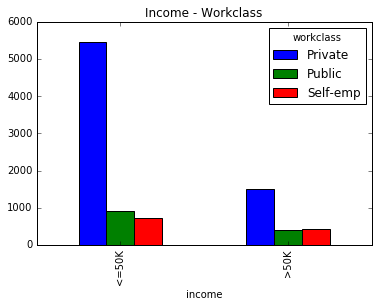

In [241]:
inc_wc = pd.crosstab(df_adult["income"], df_adult["workclass"])
plt.show(inc_wc.plot(kind="bar", title="Income - Workclass"))

So we can see that highest number of people are from private work-class in both low-income (5443) and high-income (1504) categories. But we see that there are more number of self-employed (423) work-class people than public (392) work-class people for high-income category where as there are more number of public (925) work-class people than self-employed (725) work-class people for low-income category.

In [236]:
df_adult.groupby(["income","maritalstatus"])["maritalstatus"].count()

income  maritalstatus
<=50K   Married          2730
        Single           4363
>50K    Married          2007
        Single            312
Name: maritalstatus, dtype: int64

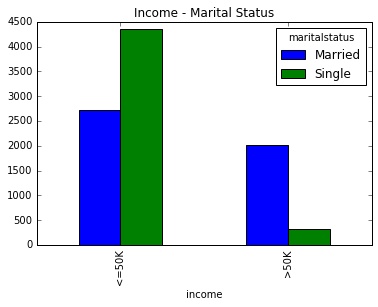

In [242]:
inc_ms = pd.crosstab(df_adult["income"], df_adult["maritalstatus"])
plt.show(inc_ms.plot(kind="bar", title="Income - Marital Status"))

So we can see that for the low-income category there are more number of people with single marital status and less with married marital status, but for the high-income category most of them are with marital status as married and very less number of people with single marital status are in high-income category.

In [243]:
df_adult.groupby(["income","race"])["race"].count()

income  race       
<=50K   Amer-Indian      83
        Asian           224
        Black           773
        Hispanic         69
        White          5944
>50K    Amer-Indian       9
        Asian            67
        Black           119
        Hispanic          6
        White          2118
Name: race, dtype: int64

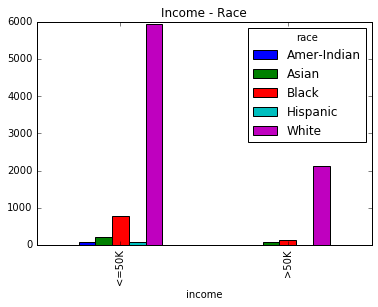

In [244]:
inc_race = pd.crosstab(df_adult["income"], df_adult["race"])
plt.show(inc_race.plot(kind="bar", title="Income - Race"))

So we can see that in the low-income group (i.e. income <= 50k), the dominant race is White and it is expected as the data set has higher number of instances where Race is White. In the high-income group (i.e. income > 50k), the dominant race is White and it is expected as the data set has higher number of instances where Race is White. Races other than white constitute a very small number in the high-income group while in low-income group other races constitute a better number as compared to high-income group.

In [245]:
df_adult.groupby(["income","sex"])["sex"].count()

income  sex   
<=50K   Female    2669
        Male      4424
>50K    Female     360
        Male      1959
Name: sex, dtype: int64

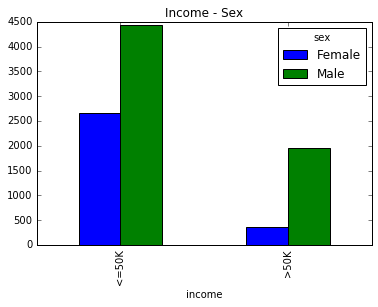

In [246]:
inc_sex = pd.crosstab(df_adult["income"], df_adult["sex"])
plt.show(inc_sex.plot(kind="bar", title="Income - Sex"))

So here we can see that most of the records have sex Male and it is dominant class in this attribute. If we talk about low-income category we can see that 63% of them are males and rest 37% of them are females but for the high-income category 84% of them are males and females constitute only 16% in high-income category which is less than half of them in low-income category. So we can say that in this data set most of the records in the high-income category are males.

# b. Predictive Modeling and Model Evaluation:

# 1) Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [256]:
df_ssf = pd.get_dummies(df_adult)
df_ssf.head()

,age,education,hoursperweek,workclass_Private,workclass_Public,workclass_Self-emp,maritalstatus_Married,maritalstatus_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39.0,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,50.0,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,38.0,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,53.0,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,28.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [263]:
df_adult_X = df_ssf.drop(['income_<=50K','income_>50K'], axis=1, inplace = False)
df_adult_Y = df_ssf['income_>50K']

In [264]:
df_adult_X.head()

,age,education,hoursperweek,workclass_Private,workclass_Public,workclass_Self-emp,maritalstatus_Married,maritalstatus_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.0,13,40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13,13,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13,40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [265]:
df_adult_Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: income_>50K, dtype: float64

# 2) Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy.

In [276]:
#(Gaussian) naive Bayes classifier
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(nbclf, df_adult_X, df_adult_Y, cv=10)
cv_scores
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy Using Cross Validation: 0.72 (+/- 0.02)


In [277]:
#Decision tree
from sklearn.tree import tree

treeclf = tree.DecisionTreeClassifier(criterion='entropy',random_state=9)
treeclf = treeclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(treeclf, df_adult_X, df_adult_Y, cv=10)
cv_scores
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy Using Cross Validation: 0.77 (+/- 0.03)


In [278]:
#Linear Discriminant Analysis
from sklearn.lda import LDA

ldclf = LDA()
ldclf = ldclf.fit(df_adult_X, df_adult_Y)

from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(ldclf, df_adult_X, df_adult_Y, cv=10)
print("Overall Accuracy Using Cross Validation: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\GunjanPandya\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variabl

Overall Accuracy Using Cross Validation: 0.81 (+/- 0.02)


# 3) [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [285]:
from sklearn import tree
from io import StringIO
import pydot

ImportError: No module named 'pydot3'